# Example behavior and ophys data
The following example shows how to access behavioral data for a given recording session and how to align with corresponding neural data

The following assumes that the AllenSDK has been installed in your environment. If not, run:

    pip install allensdk


## Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

import allensdk.brain_observatory.behavior.behavior_project_cache as bpc

import allensdk
import pkg_resources
print('allensdk version 2.10.2 or higher is required, you have {} installed'.format(pkg_resources.get_distribution("allensdk").version))

allensdk version 2.10.2 or higher is required, you have 2.10.2 installed


In [2]:
%matplotlib notebook

## Make notebook use full screen width

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
my_cache_dir = A_PATH_TO_SOME_LOCAL_FOLDER

bc = bpc.VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=my_cache_dir)
          
experiment_table = bc.get_ophys_experiment_table()                          

## Look at a sample of the experiment table

In [5]:
experiment_table.sample(5)

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,session_type,cre_line,indicator,session_number,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,ophys_session_id,behavior_session_id,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,,
993369861,MESO.1,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,485152,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,151.0,OPHYS_3_images_A,Slc17a7-IRES2-Cre,GCaMP6f,3.0,1,6.0,3,993253587,993267224,1018027784,VisualBehaviorMultiscope,75,VISl,2019-12-09 11:10:20.458602,1085399836
877669815,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,449653,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,124.0,OPHYS_4_images_B,Vip-IRES-Cre,GCaMP6f,4.0,0,0.0,4,873247524,873517635,1018027602,VisualBehaviorMultiscope,300,VISp,2019-05-22 08:08:26.000000,1085395801
947798779,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,453991,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,220.0,OPHYS_2_images_A_passive,Vip-IRES-Cre,GCaMP6f,2.0,2,9.0,6,947199653,947336783,1022731537,VisualBehaviorMultiscope,75,VISl,2019-09-16 11:47:43.190731,1085401847
1057725806,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,528097,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,188.0,OPHYS_6_images_B,Vip-IRES-Cre,GCaMP6f,6.0,0,7.0,10,1056238781,1056253022,1052096570,VisualBehaviorMultiscope,215,VISl,2020-10-13 09:46:25.940282,1085393867
826585773,CAM2P.3,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-G...,423606,Ai94(TITL-GCaMP6s),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,158.0,OPHYS_6_images_B,Slc17a7-IRES2-Cre,GCaMP6s,6.0,3,7.0,17,825682144,825801398,803516615,VisualBehavior,175,VISp,2019-02-20 15:21:42.000000,911496322


### here are all of the unique session types

In [6]:
np.sort(experiment_table['session_type'].unique())

array(['OPHYS_1_images_A', 'OPHYS_1_images_B', 'OPHYS_2_images_A_passive',
       'OPHYS_2_images_B_passive', 'OPHYS_3_images_A', 'OPHYS_3_images_B',
       'OPHYS_4_images_A', 'OPHYS_4_images_B', 'OPHYS_5_images_A_passive',
       'OPHYS_5_images_B_passive', 'OPHYS_6_images_A', 'OPHYS_6_images_B'],
      dtype=object)

### Select an `OPHYS_1_images_A` experiment at random, load the experiment data

In [7]:
experiment_id = experiment_table.query('session_type == "OPHYS_1_images_A"').sample(random_state=10).index[0]
print('getting experiment data for experiment_id {}'.format(experiment_id))
experiment_dataset = bc.get_behavior_ophys_experiment(experiment_id)

getting experiment data for experiment_id 881003496


## Look at the performance data
We can see that the d-prime metric, a measure of discrimination performance, peaked at 2.14 during this session, indicating mid-range performance.  
(d' = 0 means no discrimination performance, d' is infinite for perfect performance, but is limited to about 4.5 this dataset due to trial count limitations). 

In [8]:
experiment_dataset.get_performance_metrics()

{'trial_count': 543,
 'go_trial_count': 304,
 'catch_trial_count': 43,
 'hit_trial_count': 130,
 'miss_trial_count': 174,
 'false_alarm_trial_count': 2,
 'correct_reject_trial_count': 41,
 'auto_rewarded_trial_count': 5,
 'rewarded_trial_count': 130,
 'total_reward_count': 135,
 'total_reward_volume': 0.935,
 'maximum_reward_rate': 4.505086994064128,
 'engaged_trial_count': 336,
 'mean_hit_rate': 0.5170813677504736,
 'mean_hit_rate_uncorrected': 0.5211639806227119,
 'mean_hit_rate_engaged': 0.6496562062954426,
 'mean_false_alarm_rate': 0.10576032028344155,
 'mean_false_alarm_rate_uncorrected': 0.09702348871424006,
 'mean_false_alarm_rate_engaged': 0.13926938781198858,
 'mean_dprime': 1.3824987098004198,
 'mean_dprime_engaged': 1.5942508159238713,
 'max_dprime': 2.137132917612117,
 'max_dprime_engaged': 2.137132917612117}

### We can build a trial dataframe that tells us about behavior events on every trial. This can be merged with a rolling performance dataframe, which calculates behavioral performance metrics over a rolling window of 100 trials (excluding aborted trials, or trials where the animal licks prematurely). 

In [9]:
trials_df = experiment_dataset.trials.merge(
    experiment_dataset.get_rolling_performance_df().fillna(method='ffill'), # performance data is NaN on aborted trials. Fill forward to populate.
    left_index = True,
    right_index = True
)

In [10]:
trials_df.head()

,start_time,stop_time,lick_times,reward_time,reward_volume,hit,false_alarm,miss,stimulus_change,aborted,go,catch,auto_rewarded,correct_reject,trial_length,response_time,change_frame,change_time,response_latency,initial_image_name,change_image_name,reward_rate,hit_rate_raw,hit_rate,false_alarm_rate_raw,false_alarm_rate,rolling_dprime
trials_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,307.28935,308.27348,"[307.78975, 307.95654, 308.32352]",NaN,0.000,False,False,False,False,True,False,False,False,False,0.98413,NaN,NaN,NaN,NaN,im065,im065,NaN,NaN,NaN,NaN,NaN,NaN
1,308.79056,310.32516,[310.00823],NaN,0.000,False,False,False,False,True,False,False,False,False,1.53460,NaN,NaN,NaN,NaN,im065,im065,NaN,NaN,NaN,NaN,NaN,NaN
2,311.04241,311.89310,[311.57613],NaN,0.000,False,False,False,False,True,False,False,False,False,0.85069,NaN,NaN,NaN,NaN,im065,im065,NaN,NaN,NaN,NaN,NaN,NaN
3,312.54363,313.31090,[313.01069],NaN,0.000,False,False,False,False,True,False,False,False,False,0.76727,NaN,NaN,NaN,NaN,im065,im065,NaN,NaN,NaN,NaN,NaN,NaN
4,314.04486,321.31743,"[317.56438, 317.76456, 317.86464, 317.99808, 3...",317.21411,0.005,False,False,False,True,False,False,False,True,False,7.27257,317.56438,18571.0,317.083085,0.481295,im065,im077,NaN,NaN,NaN,NaN,NaN,NaN


### Now we can plot performance over the full experiment duration
Some key observations:
* The hit rate remains high for the first ~46 minutes of the session
* The false alarm rate graduall declines during the first ~25 minutes of the session.
* d' peaks when the hit rate is still high, but the false alarm rate dips
* The hit rate and d' fall off dramatically after ~46 minutes. This is likely due to the animal becoming sated and losing motivation to perform

<IPython.core.display.Javascript object>


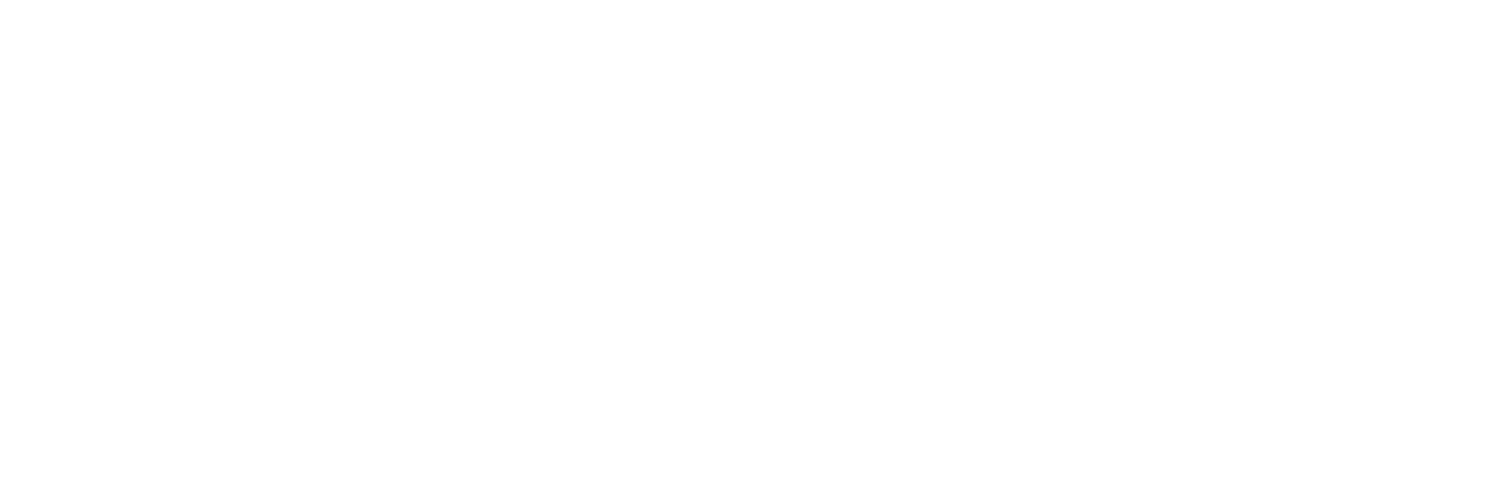

In [11]:
fig, ax = plt.subplots(2, 1, figsize = (15,5), sharex=True)
ax[0].plot(
    trials_df['start_time']/60.,
    trials_df['hit_rate'],
    color='darkgreen'
)

ax[0].plot(
    trials_df['start_time']/60.,
    trials_df['false_alarm_rate'],
    color='darkred'
)

ax[0].legend(['rolling hit rate', 'rolling false alarm rate'])

ax[1].plot(
    trials_df['start_time']/60.,
    trials_df['rolling_dprime'],
    color='black'
)

ax[1].set_xlabel('trial start time (minutes)')
ax[0].set_ylabel('response rate')
ax[0].set_title('hit and false alarm rates')
ax[1].set_title("d'")

fig.tight_layout()

## We can also look at a dataframe of stimulus presentations. This tells us the attributes of every stimulus that was shown in the session

In [12]:
experiment_dataset.stimulus_presentations.head()

,duration,end_frame,image_index,image_name,image_set,index,omitted,start_frame,start_time,stop_time
stimulus_presentations_id,,,,,,,,,,
0,0.25025,18002.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,0,False,17987,307.30600,307.55625
1,0.25020,18047.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,1,False,18032,308.05663,308.30683
2,0.25020,18092.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,2,False,18077,308.80725,309.05745
3,0.25024,18137.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,3,False,18122,309.55783,309.80807
4,0.25021,18182.0,0,im065,Natural_Images_Lum_Matched_set_training_2017.0...,4,False,18167,310.30847,310.55868


#### Also note that there is an image name called 'omitted'. This represents the time that a stimulus would have been shown, had it not been omitted from the regular stimulus cadence. They are included here for ease of analysis, but it's important to note that they are not actually stimuli. They are the lack of expected stimuli.

In [13]:
experiment_dataset.stimulus_presentations.query('image_name == "omitted"').head()

,duration,end_frame,image_index,image_name,image_set,index,omitted,start_frame,start_time,stop_time
stimulus_presentations_id,,,,,,,,,,
17,0.25,NaN,8,omitted,omitted,0,True,18751,320.04976,320.29976
22,0.25,NaN,8,omitted,omitted,1,True,18976,323.80279,324.05279
49,0.25,NaN,8,omitted,omitted,2,True,20191,344.06934,344.31934
52,0.25,NaN,8,omitted,omitted,3,True,20326,346.32122,346.57122
65,0.25,NaN,8,omitted,omitted,4,True,20911,356.07917,356.32917


#### For plotting purposes below, let's add a column that specifies a unique color for every unique image

In [14]:
unique_stimuli = [stimulus for stimulus in experiment_dataset.stimulus_presentations['image_name'].unique() if stimulus != 'omitted']
colormap = {image_name: sns.color_palette()[image_number] for image_number, image_name in enumerate(np.sort(unique_stimuli))}
colormap['omitted'] = np.nan # assign gray to omitted
colormap

{'im061': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'im062': (1.0, 0.4980392156862745, 0.054901960784313725),
 'im063': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'im065': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'im066': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'im069': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'im077': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'im085': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 'omitted': nan}

In [15]:
experiment_dataset.stimulus_presentations['color'] = experiment_dataset.stimulus_presentations['image_name'].map(lambda image_name: colormap[image_name])

### There are also dataframes containing running speed, licks, eye tracking, and neural data:

#### running speed

In [16]:
experiment_dataset.running_speed.head()

,timestamps,speed
0,7.27773,0.019115
1,7.29437,0.090604
2,7.31108,0.157861
3,7.32776,0.211029
4,7.34441,0.242318


#### licks

In [17]:
experiment_dataset.licks.head()

,timestamps,frame
0,7.39446,7
1,7.56129,17
2,8.04500,46
3,8.27854,60
4,8.46202,71


#### eye tracking data

In [18]:
experiment_dataset.eye_tracking.head()

,timestamps,cr_area,eye_area,pupil_area,likely_blink,eye_center_x,eye_center_y,eye_area_raw,eye_height,eye_width,eye_phi,pupil_center_x,pupil_center_y,pupil_area_raw,pupil_height,pupil_width,pupil_phi,cr_center_x,cr_center_y,cr_area_raw,cr_height,cr_width,cr_phi
frame,,,,,,,,,,,,,,,,,,,,,,,
0,0.16496,NaN,NaN,NaN,True,335.194187,180.017065,60454.646749,125.877652,152.873138,-0.006333,NaN,NaN,NaN,NaN,NaN,NaN,327.677353,194.848578,103.134046,5.113249,6.420299,0.488996
1,0.21064,NaN,NaN,NaN,True,335.267887,180.385575,60557.607348,126.119966,152.839282,-0.007400,NaN,NaN,NaN,NaN,NaN,NaN,327.881374,195.016418,102.602893,4.989210,6.546029,0.384647
2,0.21714,NaN,NaN,NaN,True,338.109981,175.343608,60750.458396,127.105948,152.136638,-0.015351,NaN,NaN,NaN,NaN,NaN,NaN,327.429247,191.288934,115.359343,5.792141,6.339627,-0.569084
3,0.25396,NaN,NaN,NaN,True,332.683329,179.640106,60394.607057,125.345601,153.369567,-0.030341,NaN,NaN,NaN,NaN,NaN,NaN,324.181904,195.019464,107.887063,5.504356,6.238971,0.267804
4,0.28652,NaN,NaN,NaN,True,331.211662,179.953735,60277.891351,125.049469,153.435668,-0.043842,NaN,NaN,NaN,NaN,NaN,NaN,323.283362,195.761418,80.164050,4.548921,5.609465,0.058842


#### and deltaF/F values

In [19]:
experiment_dataset.dff_traces.head()

,cell_roi_id,dff
cell_specimen_id,,
1086492995,1080843802,"[1.0800927877426147, 0.16939789056777954, 0.43..."
1086503617,1080843883,"[0.6288107633590698, 0.1938605010509491, 0.271..."
1086493239,1080843919,"[0.08208392560482025, 0.2809079885482788, 0.42..."
1086493301,1080843954,"[0.2924543023109436, 0.6212688684463501, 0.189..."
1086497146,1080843992,"[1.0083428621292114, 0.45849329233169556, 0.71..."


#### we can convert the dff_traces to long-form (aka "tidy") as follows:

In [20]:
def get_cell_timeseries_dict(dataset, cell_specimen_id):
    '''
    for a given cell_specimen ID, this function creates a dictionary with the following keys
    * timestamps: ophys timestamps
    * cell_roi_id
    * cell_specimen_id
    * dff
    This is useful for generating a tidy dataframe
    arguments:
        session object
        cell_specimen_id
    returns
        dict
    '''
    cell_dict = {
        'timestamps': dataset.ophys_timestamps,
        'cell_roi_id': [dataset.dff_traces.loc[cell_specimen_id]['cell_roi_id']] * len(dataset.ophys_timestamps),
        'cell_specimen_id': [cell_specimen_id] * len(dataset.ophys_timestamps),
        'dff': dataset.dff_traces.loc[cell_specimen_id]['dff'],

    }
    return cell_dict

experiment_dataset.tidy_dff_traces = pd.concat(
    [pd.DataFrame(get_cell_timeseries_dict(experiment_dataset, cell_specimen_id)) for cell_specimen_id in experiment_dataset.dff_traces.reset_index()['cell_specimen_id']]
).reset_index(drop=True)

experiment_dataset.tidy_dff_traces.sample(5)

,timestamps,cell_roi_id,cell_specimen_id,dff
676079,11.69084,1080844418,1086494309,0.192701
1302138,4359.01718,1080844900,1086498151,0.083662
679984,375.93985,1080844418,1086494309,0.146492
1991287,1078.08212,1080845377,1086497838,-0.213084
2189066,1509.70789,1080845493,1086496927,-0.106789


### We can look at a few trials in some detail
#### First define a function to plot a number of data streams
* each stimulus as a colored vertical bar
* running speed
* licks/rewards
* pupil area
* neural responses (dF/F)

In [31]:
def plot_stimuli(trial, ax):
    '''
    plot stimuli as colored bars on specified axis
    '''
    stimuli = experiment_dataset.stimulus_presentations.query('stop_time >= {} and start_time <= {} and not omitted'.format(float(trial['start_time']), float(trial['stop_time'])))
    for idx, stimulus in stimuli.iterrows():
        ax.axvspan(stimulus['start_time'], stimulus['stop_time'], color=stimulus['color'], alpha=0.5)

        
def plot_running(trial, ax):
    '''
    plot running speed for trial on specified axes
    '''
    trial_running_speed = experiment_dataset.running_speed.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    ax.plot(
        trial_running_speed['timestamps'],
        trial_running_speed['speed'],
        color='black'
    )
    ax.set_title('running speed')
    ax.set_ylabel('speed (cm/s)')
    

def plot_licks(trial, ax):
    '''
    plot licks as black dots on specified axis
    '''
    trial_licks = experiment_dataset.licks.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    ax.plot(
        trial_licks['timestamps'],
        np.zeros_like(trial_licks['timestamps']),
        marker = 'o',
        linestyle = 'none',
        color='black'
    )
    

def plot_rewards(trial, ax):
    '''
    plot rewards as blue diamonds on specified axis
    '''
    trial_rewards = experiment_dataset.rewards.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    ax.plot(
        trial_rewards['timestamps'],
        np.zeros_like(trial_rewards['timestamps']),
        marker = 'd',
        linestyle = 'none',
        color='blue',
        markersize = 10,
        alpha = 0.25
    )
    
def plot_pupil(trial, ax):
    '''
    plot pupil area on specified axis
    '''
    trial_eye_tracking = experiment_dataset.eye_tracking.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    ax.plot(
        trial_eye_tracking['timestamps'],
        trial_eye_tracking['pupil_area'],
        color='black'
    )
    ax.set_title('pupil area')
    ax.set_ylabel('pupil area\n$(pixels^2)$')
    

def plot_dff(trial, ax):
    '''
    plot each cell's dff response for a given trial
    '''
    trial_dff_traces = experiment_dataset.tidy_dff_traces.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    for cell_specimen_id in experiment_dataset.tidy_dff_traces['cell_specimen_id'].unique():
        ax.plot(
            trial_dff_traces.query('cell_specimen_id == @cell_specimen_id')['timestamps'],
            trial_dff_traces.query('cell_specimen_id == @cell_specimen_id')['dff']
        )
        ax.set_title('deltaF/F responses')
        ax.set_ylabel('dF/F')
    
def make_trial_plot(trial):
    '''
    combine all plots for a given trial
    '''
    fig, axes = plt.subplots(4, 1, figsize = (15, 8), sharex=True)

    for ax in axes:
        plot_stimuli(trial, ax)
            
    plot_running(trial, axes[0])

    plot_licks(trial, axes[1])
    plot_rewards(trial, axes[1])
    
    axes[1].set_title('licks and rewards')
    axes[1].set_yticks([])
    axes[1].legend(['licks','rewards'])

    plot_pupil(trial, axes[2])

    plot_dff(trial, axes[3])
    
    axes[3].set_xlabel('time in session (seconds)')
    fig.tight_layout()
    return fig, axes

### here is a hit trial
Notes:
* The image identity changed just after t = 2361 seconds (note the color change in the vertical spans)
* The animal was running steadily prior to the image change, then slowed to a stop after the change
* The first lick occured about 500 ms after the change, and triggered an immediate reward
* The pupil area shows some missing data - these were points that were filtered out as outliers.
* There appears to be one neuron that was responding regularly to the stimulus prior to the change. 

<IPython.core.display.Javascript object>


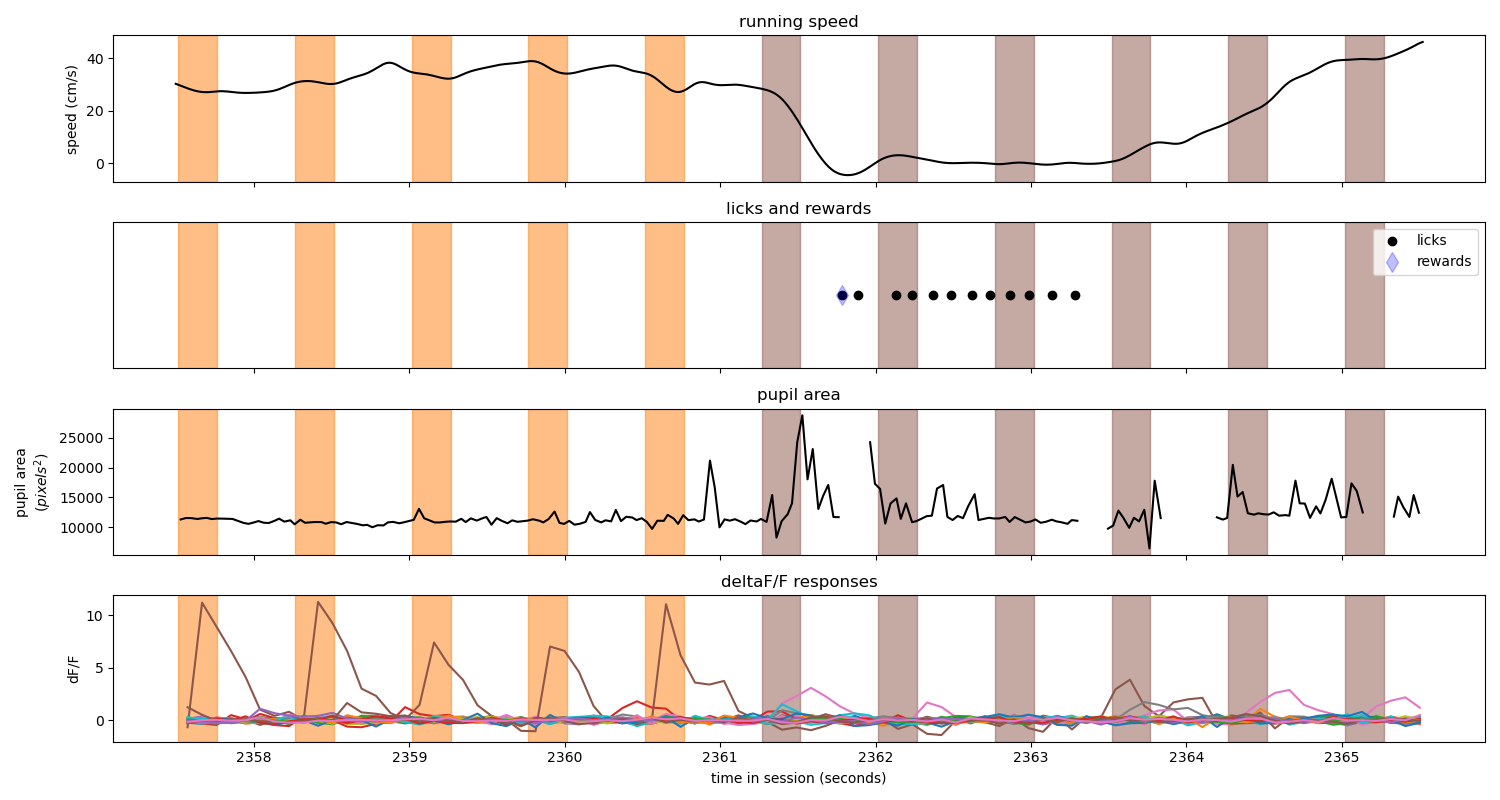

In [32]:
trial = experiment_dataset.trials.query('hit').sample(random_state = 1)
fig, axes = make_trial_plot(trial)

### here is a miss trial
Notes:
* The image identity changed just after t = 824 seconds (note the color change in the vertical spans)
* The animal was running relatively steadily during the entire trial and did not slow after the stimulus identity change
* There were no licks or rewards on this trial
* The pupil area shows some missing data - these were points that were filtered out as outliers.
* One neuron had a large response just prior to the change, but none appear to be stimulus locked on this trial

<IPython.core.display.Javascript object>


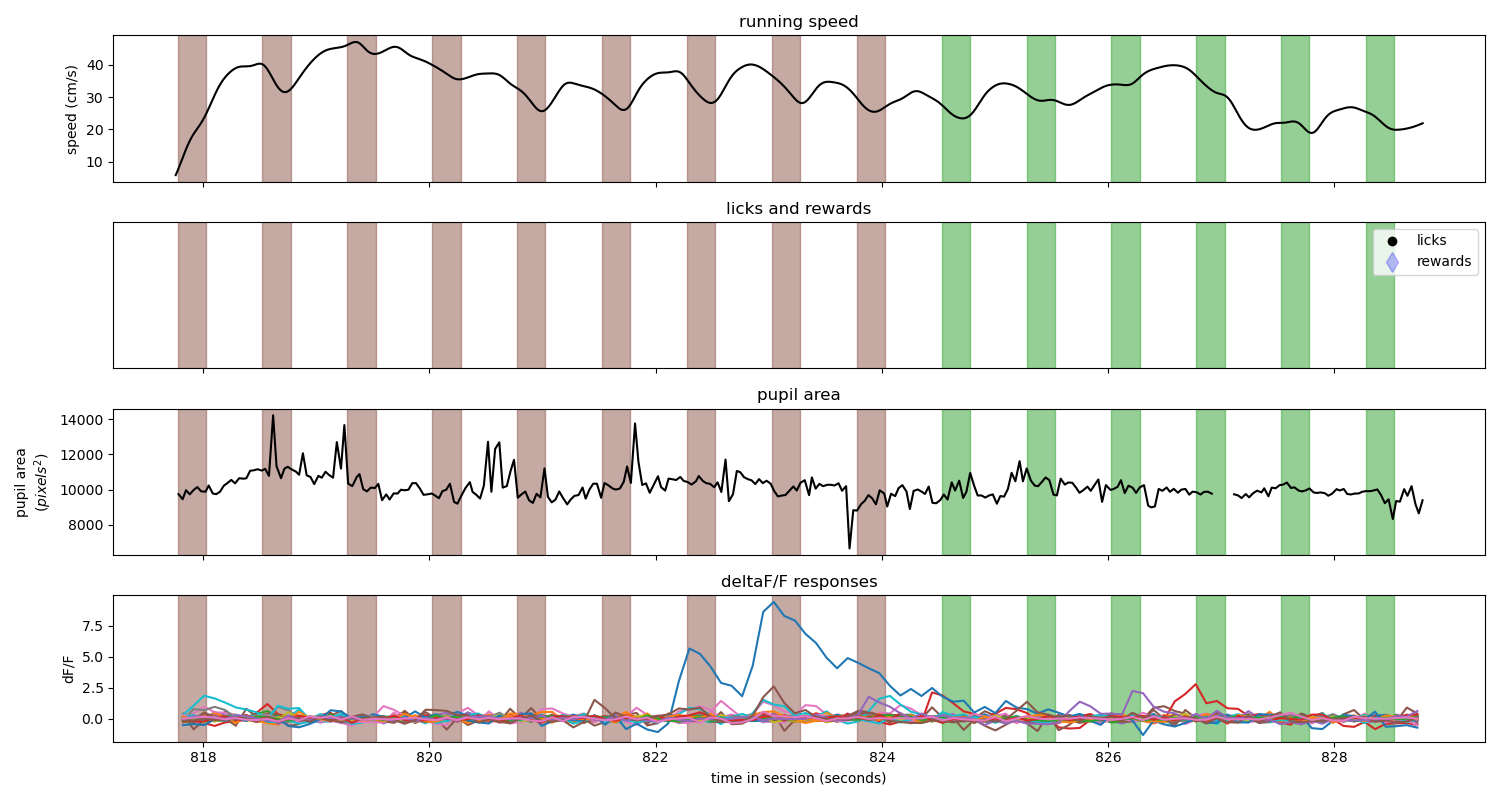

In [33]:
trial = experiment_dataset.trials.query('miss').sample(random_state = 2)
fig, axes = make_trial_plot(trial)

### here is a false alarm trial
Notes:
* The image identity was consistent during the entire trial
* The animal slowed and licked partway through the trial
* There were no rewards on this trial
* The pupil area shows some missing data - these were points that were filtered out as outliers.
* There were not any neurons with obvious stimulus locked responses

<IPython.core.display.Javascript object>


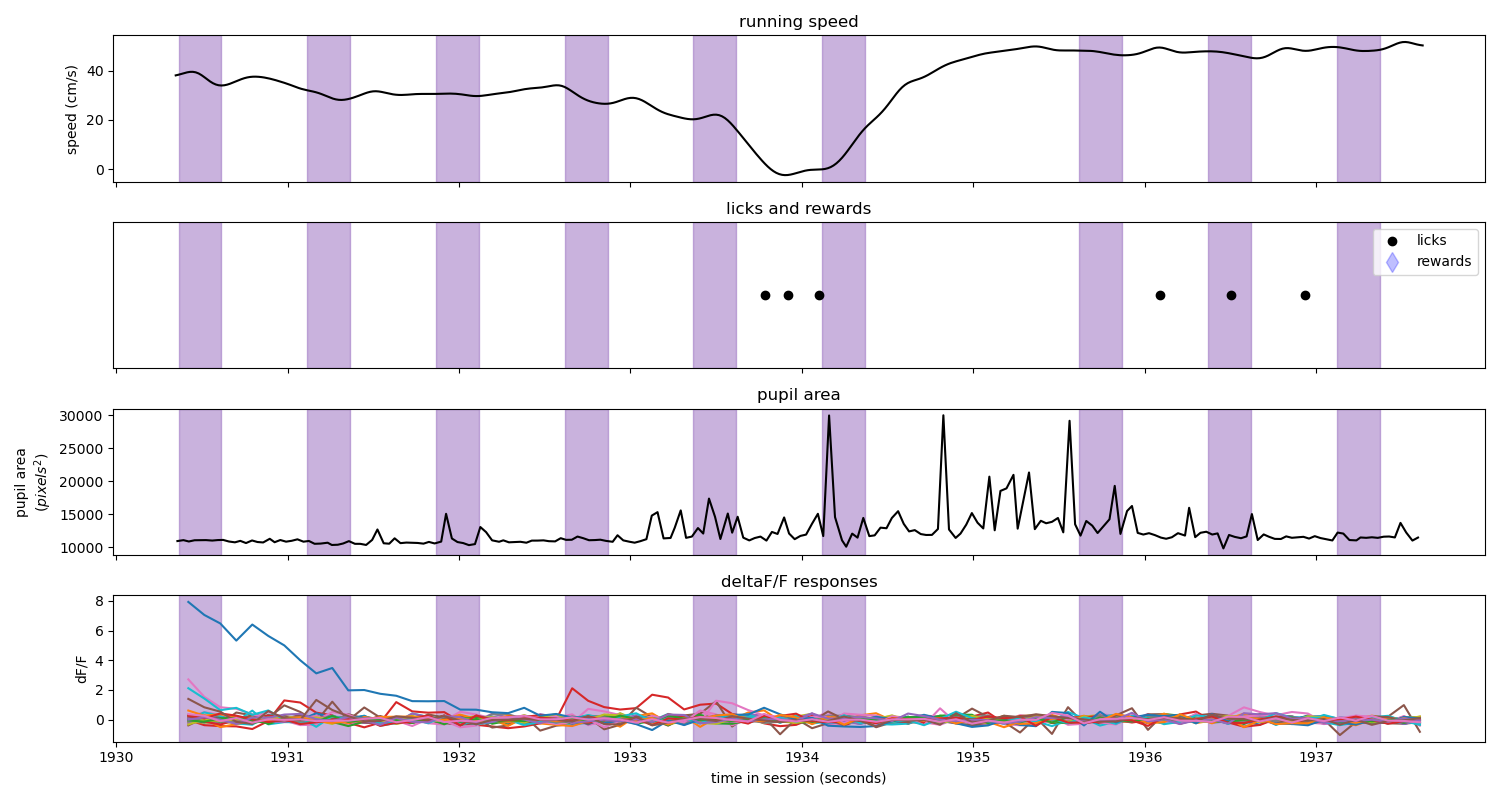

In [34]:
trial = experiment_dataset.trials.query('false_alarm').sample(random_state = 2)
fig, axes = make_trial_plot(trial)

### And finally, a correct rejection
Notes:
* The image identity was consistent during the entire trial
* The animal did not slow or lick during this trial
* There were no rewards on this trial

<IPython.core.display.Javascript object>


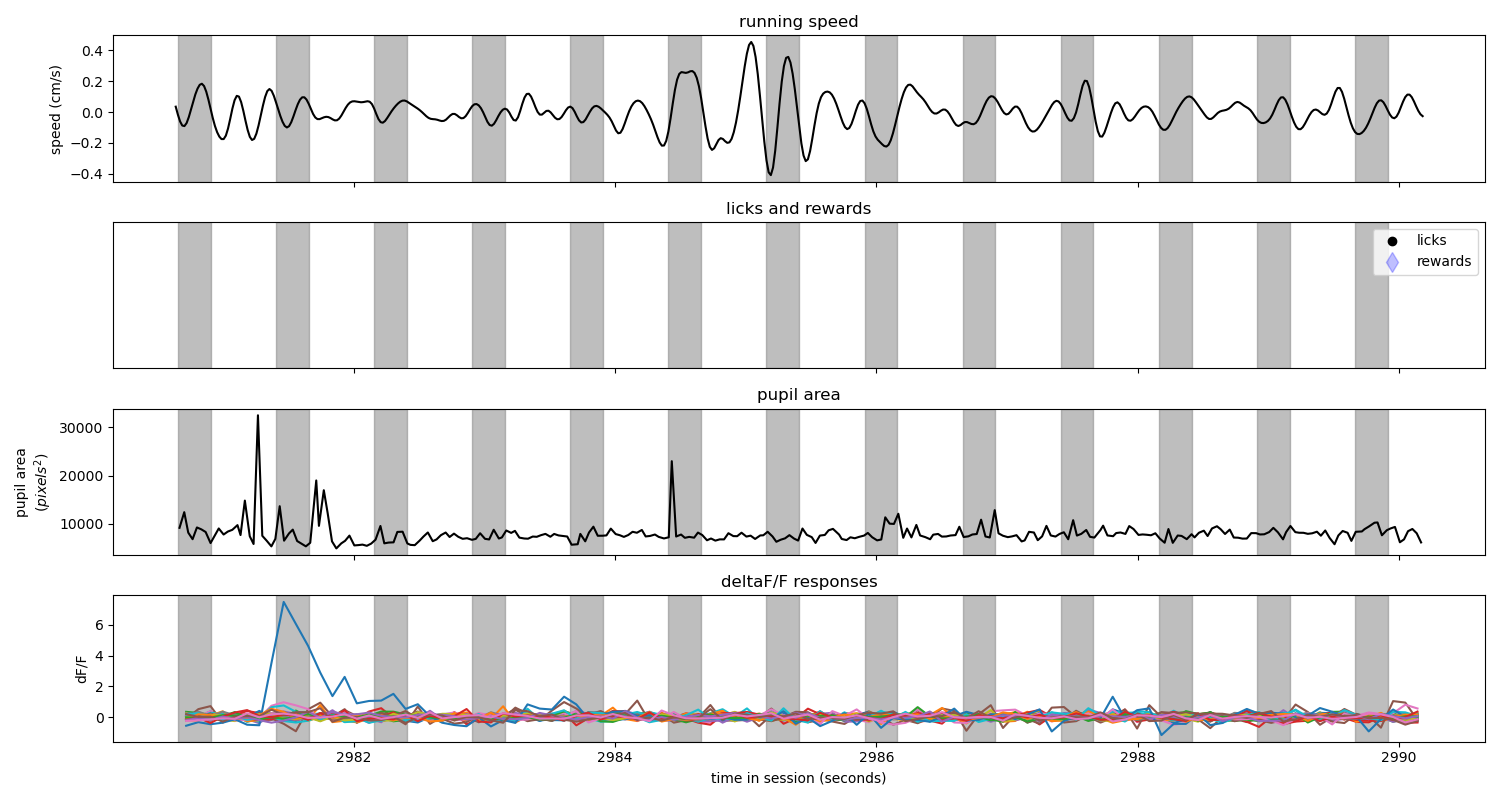

In [35]:
trial = experiment_dataset.trials.query('correct_reject').sample(random_state = 10)
fig, axes = make_trial_plot(trial)